## **Avance II PIA**

# Equipo: 10
Grupo: 002 Miércoles

### Integrantes
- 1864878 Cerda Serrato Alan René
- 1867341 Cruz Lerma Jorge Antonio
- 1941475 Galindo Vázquez Jesús Alfonso
- 1630606 Valencia González Jesús Eduardo

# 1.- Base de Datos: Datos históricos del Bitcoin

> A) Historical Bitcoin Data

> B) https://www.kaggle.com/umeshkumar017/historical-bitcoin-data?select=Bitcoin+Historical+Data+-+In+Rupees.csv








# 2.- Introducción General



> A) ¿Qué es el Bitcoin? 

>Bitcoin es un protocolo, proyecto de código abierto y red entre iguales que se utiliza como criptomoneda, sistema de pago y mercancía.
>Fue concebida en 2008​ por una entidad conocida bajo el seudónimo de Satoshi Nakamoto, cuya identidad concreta se desconoce. 
>En la actualidad, una cantidad considerable de empresas y pequeños negocios aceptan bitcoins como medio de pago​ para servicios de todo tipo. Su alcance internacional, y el hecho de que los usuarios pueden comerciar de forma pseudoanónima, ha permitido que se abra paso en sectores cada vez más regulados, como apuestas en línea y partidas de póker.

>El uso de Bitcoin y los servicios relacionados con él están sujetos a la legislación de cada país, provincia, municipio u otras entidades administrativas, pudiendo ser legal o ilegal dependiendo de si se han realizado decretos al respecto, o como consecuencia de la decisión expresa de reconocer o tratarlo como divisa, valor, mercancía, etc, por alguna entidad reguladora con jurisdicción en alguna de esas materias. 



# 3.- Descripción de los datos

> A) Los datos son descritos con una tabla que avanza mediante el tiempo, registrando la variabilidad de valor en la moneda. No presenta gráficos ni recursos visuales.

> B) Se tienen 7 columnas, las cuales son:
1.   **Date** <- Fecha del dia a registrar. Tipo de dato: str 
2.   **Price** <- Precio de la moneda. Tipo de dato: float
3.   **Open** <- Valor de apertura. Tipo de dato: float
4.   **High** <- El valor más alto. Tipo de dato: float
5.   **Low** <- El valor más bajo. Tipo de dato: float
6.   **Vol.** <- Volumen de Bitcoins comerciados. Tipo de dato: str
7.   **Change %** <- Porcentaje de cambio. Tipo de dato: str
 Tamaño de la base: 7 columnas y 4057 filas.

# 4.- Justificación del uso de datos

> A) Tenemos una gran curiosidad por el Bitcoin especialmente porque el mundo de las criptomonedas es algo que está en tendencias actualmente, sobre todo por su altísimo valor ( a fecha de hoy, 30/08/2021, 1 bitcoin equivale a 975,756.02 pesos mexicanos. 
> Pueden tomar aún mas relevancia en el futuro, y para nuestra carrera (Actuaría), es de suma importancia estar enterados de las nuevas tendencias del mundo financiero.

> B) Alguno de los beneficios sobre estar investigando acerca de este tema, es que podriamos estar mejor preparados para una posible inversión u otro movimiento con la moneda.
Creemos que sin duda es un tema muy relevante, ya que las criptomonedas pueden ser el futuro de la economía.

# 5.- Objetivo Principal y secundario



> **A)** El objetivo **principal** es predecir si es viable invertir en el Bitcoin a corto y mediano plazo mediante sus cambios de valor.

> **B)** El objetivo **secundario** es predecir si el valor del bitcoin seguirá a la alza.

# 6.- Preguntas de Interés

> 1.- ¿Cuál es precio más alto que ha alcanzado el Bitcoin?

> 2.- ¿En que año empezó el auge del valor del Bitcoin?

# 7.- Parte de la Programación

Importar todas las librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Bitcoin Historical Data - In Rupees.csv")

**Limpieza de la base**

Tamaño de la base (filas, columnas)

In [ ]:
df.shape

(4056, 7)

Vista de la base sin modificaciones

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 24, 2021","48,846.3","49,532.5","49,847.4","48,812.4",59.89K,-1.40%
1,"Aug 23, 2021","49,539.7","49,255.4","50,498.8","49,038.6",75.37K,0.58%
2,"Aug 22, 2021","49,254.5","48,870.4","49,480.3","48,151.0",49.32K,0.77%
3,"Aug 21, 2021","48,875.8","49,330.0","49,719.1","48,293.5",18.20K,-0.91%
4,"Aug 20, 2021","49,324.0","46,756.7","49,343.3","46,646.8",83.19K,5.49%
...,...,...,...,...,...,...,...
4051,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4052,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4053,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4054,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


Cantidad de datos nulos en las columnas

In [ ]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

No hay datos nulos en la base

Acomodar los datos para usarlos correctamente en la estadística y las gráficas

In [ ]:
#Fuente: https://www.kaggle.com/anseldsouza/bitcoin-price-prediction-using-lstm

# Preparar los datos
df["Price"] = df["Price"].replace(",", "", regex = True)
df["Open"] = df["Open"].replace(",", "", regex = True)
df["High"] = df["High"].replace(",", "", regex = True)
df["Low"] = df["Low"].replace(",", "", regex = True)

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0
df['Vol.'] = df['Vol.'].apply(value_to_float)

df["Change %"] = df["Change %"].replace("%", "", regex = True)

# A flotantes
df["Price"] = pd.to_numeric(df["Price"], downcast="float")
df["Open"] = pd.to_numeric(df["Open"], downcast="float")
df["High"] = pd.to_numeric(df["High"], downcast="float")
df["Low"] = pd.to_numeric(df["Low"], downcast="float")
df["Vol."] = pd.to_numeric(df["Vol."], downcast="float")
df["Change %"] = pd.to_numeric(df["Change %"], downcast="float")

df.head(3)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 24, 2021",48846.300781,49532.500000,49847.398438,48812.398438,59890.0,-1.40
1,"Aug 23, 2021",49539.699219,49255.398438,50498.800781,49038.601562,75370.0,0.58
2,"Aug 22, 2021",49254.500000,48870.398438,49480.300781,48151.000000,49320.0,0.77


Cambiar nombres de columnas para mejor entendimiento de la base

In [ ]:
df = df.rename(columns = {'Price':'Precio'})
df = df.rename(columns = {'Date':'Fecha'})
df = df.rename(columns = {'Open':'Apertura'})
df = df.rename(columns = {'High':'Alto'})
df = df.rename(columns = {'Low':'Bajo'})
df = df.rename(columns = {'Vol.':'Volumen'})
df = df.rename(columns = {'Change %':'CambioP'})
df

,Fecha,Precio,Apertura,Alto,Bajo,Volumen,CambioP
0,"Aug 24, 2021",48846.300781,49532.500000,49847.398438,48812.398438,59890.0,-1.40
1,"Aug 23, 2021",49539.699219,49255.398438,50498.800781,49038.601562,75370.0,0.58
2,"Aug 22, 2021",49254.500000,48870.398438,49480.300781,48151.000000,49320.0,0.77
3,"Aug 21, 2021",48875.800781,49330.000000,49719.101562,48293.500000,18200.0,-0.91
4,"Aug 20, 2021",49324.000000,46756.699219,49343.300781,46646.800781,83190.0,5.49
...,...,...,...,...,...,...,...
4051,"Jul 22, 2010",0.100000,0.100000,0.100000,0.100000,2160.0,0.00
4052,"Jul 21, 2010",0.100000,0.100000,0.100000,0.100000,580.0,0.00
4053,"Jul 20, 2010",0.100000,0.100000,0.100000,0.100000,260.0,0.00
4054,"Jul 19, 2010",0.100000,0.100000,0.100000,0.100000,570.0,0.00


La base está lista. Ahora solo queda guardar la nueva base de datos

In [ ]:
df.to_csv("Datos históricos del Bitcoin.csv")

## **Información estadística básica**

Importamos la base nueva

In [ ]:
df = pd.read_csv("/content/Datos históricos del Bitcoin.csv")
df

,Unnamed: 0,Fecha,Precio,Apertura,Alto,Bajo,Volumen,CambioP
0,0,"Aug 24, 2021",48846.3,49532.5,49847.4,48812.4,59890.0,-1.40
1,1,"Aug 23, 2021",49539.7,49255.4,50498.8,49038.6,75370.0,0.58
2,2,"Aug 22, 2021",49254.5,48870.4,49480.3,48151.0,49320.0,0.77
3,3,"Aug 21, 2021",48875.8,49330.0,49719.1,48293.5,18200.0,-0.91
4,4,"Aug 20, 2021",49324.0,46756.7,49343.3,46646.8,83190.0,5.49
...,...,...,...,...,...,...,...,...
4051,4051,"Jul 22, 2010",0.1,0.1,0.1,0.1,2160.0,0.00
4052,4052,"Jul 21, 2010",0.1,0.1,0.1,0.1,580.0,0.00
4053,4053,"Jul 20, 2010",0.1,0.1,0.1,0.1,260.0,0.00
4054,4054,"Jul 19, 2010",0.1,0.1,0.1,0.1,570.0,0.00


Eliminamos la columna "Unnamed: 0"

In [ ]:
df.drop(columns = "Unnamed: 0", inplace = True)
df.head(3)

,Fecha,Precio,Apertura,Alto,Bajo,Volumen,CambioP
0,"Aug 24, 2021",48846.3,49532.5,49847.4,48812.4,59890.0,-1.40
1,"Aug 23, 2021",49539.7,49255.4,50498.8,49038.6,75370.0,0.58
2,"Aug 22, 2021",49254.5,48870.4,49480.3,48151.0,49320.0,0.77


- Promedio de las columnas

In [ ]:
for i in range(1, len(df.columns)):
  print("El promedio de los elementos de la columna ", df.columns[i], " es ", df[df.columns[i]].mean())

El promedio de los elementos de la columna  Precio  es  5421.927292899433
El promedio de los elementos de la columna  Apertura  es  5409.91208086787
El promedio de los elementos de la columna  Alto  es  5575.478525641043
El promedio de los elementos de la columna  Bajo  es  5227.333703155872
El promedio de los elementos de la columna  Volumen  es  292762.82790927024
El promedio de los elementos de la columna  CambioP  es  0.4939644970414198


Los promedios son importantes porque así nos podemos dar una idea general de cómo se ha comportado el bitcoin de 2010 a 2021.

- Suma acumulada fila por fila

In [ ]:
print("La suma acumulada del volumen es\n", df['Volumen'].cumsum())

La suma acumulada del volumen es
 0       5.989000e+04
1       1.352600e+05
2       1.845800e+05
3       2.027800e+05
4       2.859700e+05
            ...     
4051    1.187445e+09
4052    1.187445e+09
4053    1.187445e+09
4054    1.187446e+09
4055    1.187446e+09
Name: Volumen, Length: 4056, dtype: float64


De las sumas acumuladas, esta es la que más es útil, ya que así podemos ver cómo crece el volumen del Bitcoin con cada día que pasa.

- Mínimo y máximo

In [ ]:
for i in range(1, len(df.columns)):
  print("El mínimo de la columna ", df.columns[i], " es ", df[df.columns[i]].min(), " y el máximo es ", df[df.columns[i]].max())

El mínimo de la columna  Precio  es  0.1  y el máximo es  63540.9
El mínimo de la columna  Apertura  es  0.0  y el máximo es  63544.2
El mínimo de la columna  Alto  es  0.1  y el máximo es  64778.0
El mínimo de la columna  Bajo  es  0.0  y el máximo es  62067.5
El mínimo de la columna  Volumen  es  0.0  y el máximo es  20260000.0
El mínimo de la columna  CambioP  es  -57.21  y el máximo es  336.84


Saber los máximos y mínimos nos ayuda a ver cómo ha mejorado el bitcoin, o bien, el posible gran potencial que tiene.

Además, con esta información podemos contestar una de las preguntas de interés:

**> 1.- ¿Cuál es precio más alto que ha alcanzado el Bitcoin?**

La respuesta es: **63,540.8984375 USD**

- Desviación estándar

In [ ]:
for i in range(1, len(df.columns)):
  print("La desviación estándar de la columna", df.columns[i], "es", df[df.columns[i]].std())

La desviación estándar de la columna Precio es 10816.886398866334
La desviación estándar de la columna Apertura es 10795.756470951057
La desviación estándar de la columna Alto es 11141.061146863907
La desviación estándar de la columna Bajo es 10406.451635156804
La desviación estándar de la columna Volumen es 983381.4437095218
La desviación estándar de la columna CambioP es 7.739581700286563


Con la desviación estándar podemos saber más o menos cuánto varían los datos y saber qué tan estable es el bitcoin.

- Correlación

In [ ]:
df.corr()

,Precio,Apertura,Alto,Bajo,Volumen,CambioP
Precio,1.000000,0.998832,0.999497,0.999337,0.060510,-0.004513
Apertura,0.998832,1.000000,0.999483,0.999041,0.061104,-0.017551
Alto,0.999497,0.999483,1.000000,0.998949,0.060524,-0.010393
Bajo,0.999337,0.999041,0.998949,1.000000,0.060949,-0.009531
Volumen,0.060510,0.061104,0.060524,0.060949,1.000000,-0.009292
CambioP,-0.004513,-0.017551,-0.010393,-0.009531,-0.009292,1.000000


Y por último, la correlación. Con esto podemos saber cuáles variables están relacionadas con otras y en qué medida. Mientras más correlación haya, más relacionadas están las variables.

En el siguiente mapa de correlación esto se aprecia mejor:

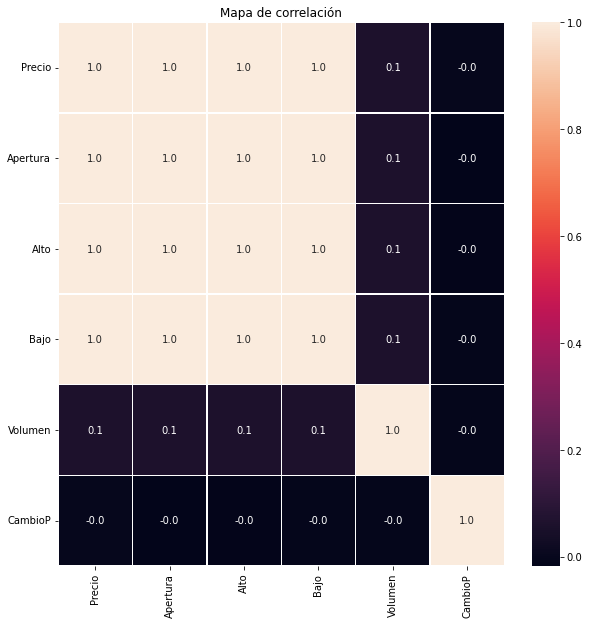

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot= True, linewidths = 0.5, fmt = ".1f", ax = ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Como vemos, los precios se relacionan mucho entre sí, pero estos no se relacionan casi nada con el volumen o el cambio del porcentaje.

##**Gráficas**

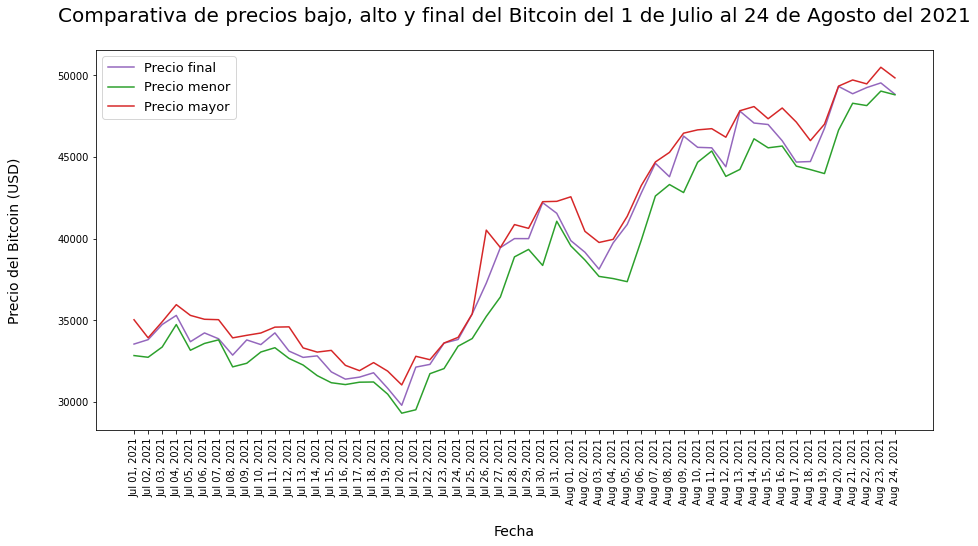

In [ ]:
# Fecha

a = len(df['Fecha'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['Fecha'].head(55)[a])
  a = a - 1
fecha = f

# Precio
a = len(df['Precio'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['Precio'].head(55)[a])
  a = a - 1
precio = f

# Mayor
a = len(df['Alto'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['Alto'].head(55)[a])
  a = a - 1
mayor = f

# Menor
a = len(df['Bajo'].head(55)) - 1
f = []

while (a >= 0):
  f.append(df['Bajo'].head(55)[a])
  a = a - 1
menor = f

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(fecha, precio, color = 'tab:purple', label = "Precio final")
ax.plot(fecha, menor, color = 'tab:green', label = "Precio menor")
ax.plot(fecha, mayor, color = 'tab:red', label = "Precio mayor")
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel("Precio del Bitcoin (USD)\n\n", fontsize = 14)
plt.xlabel("\nFecha", fontsize = 14)
plt.title("Comparativa de precios bajo, alto y final del Bitcoin del 1 de Julio al 24 de Agosto del 2021\n", fontsize = 20)
plt.xticks(rotation = 90) # Fuente de apoyo para esta línea: https://www.delftstack.com/es/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
plt.show()

En la gráfica anterior se muestran solo los datos del 1/Jul/2021 al 24/Ago/2021 con el fin de mostrar con mayor claridad la separación entre cada línea de precios, ya que si se grafican todos los datos, no se puede apreciar bien cómo se comporta el precio del bitcoin comparándolo con su máximo y mínimo diario.

Y vemos que el precio va a la alza.

Ahora, para la siguiente gráfica primero se ordenaron los datos de más antiguo a más actual para visualizar mejor los datos

- Ordenar fecha

In [ ]:
idx = len(df['Fecha']) - 1
newListx = []

while (idx >= 0):
  newListx.append(df['Fecha'][idx])
  idx = idx - 1
x = newListx
df['Fecha'] = x

- Ordenar precios

In [ ]:
idy = len(df['Precio']) - 1
newListy = []

while (idy >= 0):
  newListy.append(df['Precio'][idy])
  idy = idy - 1
y = newListy
df['Precio'] = y

- Ver gráfica

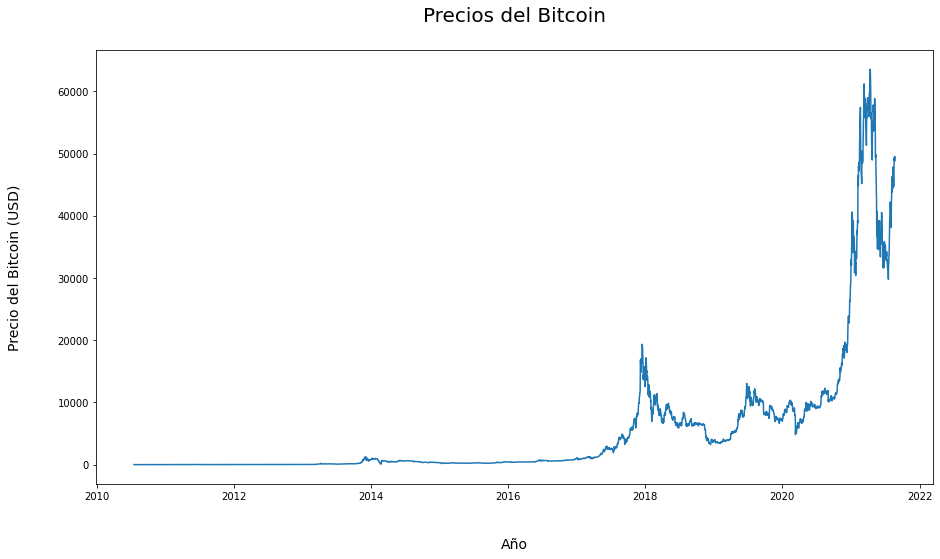

In [ ]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(x, y)
plt.xticks([-199, 533, 1263, 1993, 2724, 3454, 4186], ['2010', '2012', '2014', '2016', '2018', '2020', '2022'])
plt.ylabel("Precio del Bitcoin (USD)\n\n", fontsize = 14)
plt.xlabel("\n\nAño", fontsize = 14)
plt.title("Precios del Bitcoin\n", fontsize = 20)

# Mostrar
plt.show()

Se ve evidentemente que conforme se va acercando a la fecha actual, el precio del bitcoin va subiendo. Se está recuperando de una caída muy notoria.

Además, gracias a esta gráfica podemos contestar la otra pregunta de interés:

**> 2.- ¿En que año empezó el auge del valor del Bitcoin?**

La respuesta es: **En 2020**. A pesar de que en 2018 tuvo una alza en el precio, volvió a bajar casi hasta donde empezó, pero en 2020 comenzó a crecer considerablemente. Tal vez por la contingencia del COVID-19.

Para la próxima gráfica, primero ordenamos lo precios mínimos de más antiguo a más actual.

Text(0, 0.5, 'Precio (USD)\n')

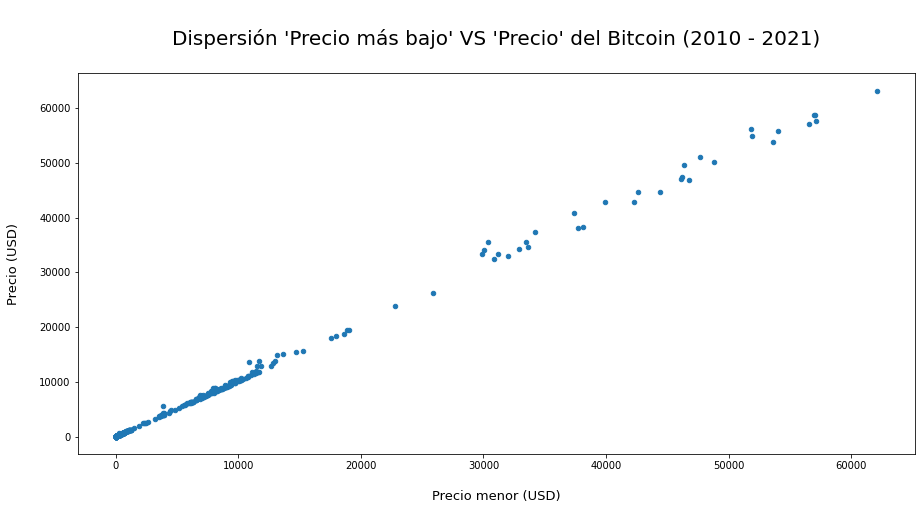

In [ ]:
idz = len(df['Bajo']) - 1
newListz = []

while (idz >= 0):
  newListz.append(df['Bajo'][idz])
  idz = idz - 1
z = newListz
df['Bajo'] = z

df[df['Precio'] < 70000].sample(500).plot.scatter(x = 'Bajo', y = 'Precio', figsize = (15, 7))
plt.title("\nDispersión 'Precio más bajo' VS 'Precio' del Bitcoin (2010 - 2021)\n", fontsize = 20)
plt.xlabel("\nPrecio menor (USD)", fontsize = 13)
plt.ylabel("Precio (USD)\n", fontsize = 13)

Como vemos en la gráfica de dispersión, el precio y el precio menor del Bitcoin (Price, Low) están muy relacionados. Dependiendo de cuánto sea el precio menor (Low), será el precio del Bitcoin (Price) cada día.

(Se usaron 500 muestras para poder ver mejor la dispersión en los precios más altos. Esto porque la mayoría de los datos están entre 0 y 10,000)

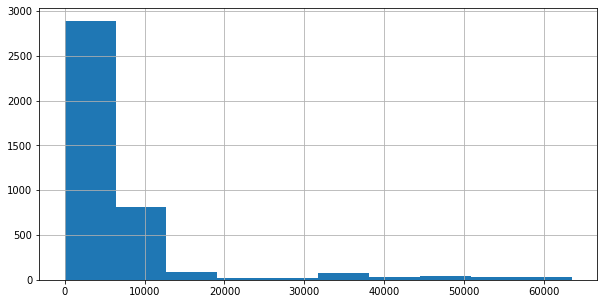

In [ ]:
df.Precio.hist(figsize=(10,5))

Podemos ver que el precio maximo alcanzado del bitcoin está alrededor del 60,000.

Además, es claro que la mayoría de los datos del precio del Bitcoin están entre el 0 y el 10,000.

# Conclusión

Con la estadística básica y lagunas gráfica, ya podemos contestar correctamente las preguntas de interés:

**1.- ¿Cuál es precio más alto que ha alcanzado el Bitcoin?**

 La respuesta es: **63,540.8984375 USD**

**2.- ¿En que año empezó el auge del valor del Bitcoin?**
 
La respuesta es: **En 2020**. A pesar de que en 2018 tuvo una alza en el precio, volvió a bajar casi hasta donde empezó, pero en 2020 comenzó a crecer considerablemente. Tal vez por la contingencia del COVID-19.

Parece que podemos decir que la tandencia del precio del Bitcoin es creciente y que así seguirá, pero todavía no lo podemos asegurar, ya que hubo momentos en los que el precio bajó considerablemente.

La estrategia que teníamos era que debemos hacer predicciones para asegurar que resolvamos los objetivos correctamente, y eso sigue igual. Se harán predicciones, veremos su comportamiento y nos aseguraremos del comportamiento futuro del Bitcoin.